In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

## Excercise 1. Perceptron

In [2]:
def load_data(file_name, encode_labels):
    data = np.array(pd.read_csv(file_name))
    np.random.shuffle(data)
    X, y =  encode_labels(data[:,0:-1], data[:,-1])
    plot_dataset(X)
    split_index = int(len(data)*0.8)
    X_train, X_test = X[0:split_index], X[split_index:]
    y_train, y_test = y[0:split_index], y[split_index:]
    return X_train, y_train, X_test, y_test

In [3]:
def plot_dataset(X):
    pca = PCA(n_components=2)
    x_ = pca.fit_transform(X)
    plt.scatter(*x_.T, s=8)

In [4]:
def separate_setosa(X, labels):
    y = [0 if l == 'Iris-setosa' else 1 for l in labels]
    return np.array(X), np.array(y)

In [5]:
def separate_virginica(X, labels):
    y_ = labels[np.where(labels != 'Iris-setosa')]
    X_ = X[np.where(labels != 'Iris-setosa')]
    y = [0 if l == 'Iris-virginica' else 1 for l in y_]
    return np.array(X_), np.array(y)

In [6]:
class Perceptron:
    def __init__(self, T, learning_rate=0.1):
        self.T = T
        self.lr = learning_rate
        self.accuracy = []
        self.weights = None
        self.b = None
    
    def train(self, X, y):
        w = np.zeros(len(X[0]))
        b = 0
        for t in range(self.T):
            for i, x in enumerate(X):
                y_= 1 if np.dot(w.T, x)+b >= 0 else 0
                error = y[i] - y_
                self.accuracy.append(error)
                b = b + self.lr * error
                w = np.array([w[j] + self.lr*(error)*x[j] for j in range(len(w))])
        self.weights = w
        self.b = b
        
    def predict(self, X):
        prediction = []
        for i, x in enumerate(X):
            y= 1 if np.dot(self.weights.T, x) + self.b >= 0 else 0
            prediction.append(y)
        return prediction

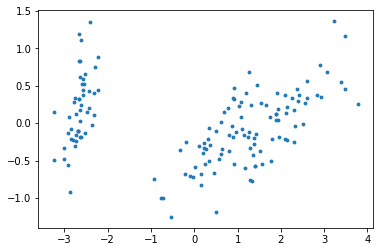

In [7]:
X_train, y_train, X_test, y_test = load_data('iris.data', separate_setosa)

In [8]:
prec_setosa = Perceptron(3)
prec_setosa.train(X_train, y_train)
prediction_setosa = prec_setosa.predict(X_test)

In [9]:
accuracy = (1-(len(np.where(prediction_setosa != y_test)[0])/len(y_test)))*100
print('Accuracy: ', accuracy, '%')

Accuracy:  100.0 %


### a) Separate Versicolour from Virginica:

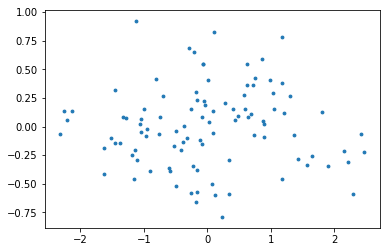

In [10]:
X_train, y_train, X_test, y_test = load_data('iris.data', separate_virginica)

In [18]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(100, 4) (100,) (0, 4) (0,)


In [14]:
prec_virginica = Perceptron(3)
prec_virginica.train(X_train, y_train)
prediction_virginica = prec_virginica.predict(X_test)

In [15]:
accuracy = (1-(len(np.where(prediction_virginica != y_test)[0])/len(y_test)))*100
print('Accuracy: ', accuracy, '%')

ZeroDivisionError: division by zero